<a href="https://colab.research.google.com/github/AdiraMartin/LRFMC_ExploringUnsupervisedLearning/blob/main/LRFMC_Unsupervised_Clustering_Adira_Khansa_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1wYL7wQt_dmsrypoIZ6Y3zFNki9shU03g

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wYL7wQt_dmsrypoIZ6Y3zFNki9shU03g
To: /content/flight.csv
100% 8.94M/8.94M [00:00<00:00, 112MB/s]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [ ]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
if df['MEMBER_NO'].nunique() == 1:
    print("Semua nilai dalam kolom sama")
else:
    print("Ada nilai yang berbeda dalam kolom")


Ada nilai yang berbeda dalam kolom


### Understanding, Cleansing and Build Dataset

**Data Dictionary**

1. `MEMBER_NO` : nomor unik untuk setiap anggota program loyalitas
2. `FFP_DATE` : tanggal bergabungnya anggota dengan program loyalitas
3. `FIRST_FLIGHT_DATE` : tanggal penerbangan pertama anggota dengan maskapai
4. `GENDER` : jenis kelamin anggota (Laki-laki atau Perempuan)
5. `FFP_TIER` : level keanggotaan dalam program loyalitas (1-6)
6. `WORK_CITY` : kota tempat anggota bekerja
7. `WORK_PROVINCE` : provinsi tempat anggota bekerja
8. `WORK_COUNTRY`: negara tempat anggota bekerja
9. `AGE` : usia anggota pada saat pengumpulan data
10. `LOAD_TIME` : tanggal dan waktu pengumpulan data
11. `FLIGHT_COUNT` : jumlah penerbangan yang telah diambil oleh anggota selama menjadi anggota program loyalitas
12. `BP_SUM` : jumlah poin yang diperoleh dari penerbangan oleh anggota
13. `SUM_YR_1` : jumlah uang yang dihabiskan oleh anggota dalam setahun terakhir untuk penerbangan dengan maskapai
14. `SUM_YR_2` : jumlah uang yang dihabiskan oleh anggota dalam dua tahun terakhir untuk penerbangan dengan maskapai
15. `SEG_KM_SUM` : jumlah kilometer yang diterbangi oleh anggota dengan maskapai
16. `LAST_FLIGHT_DATE` : tanggal terakhir anggota terbang dengan maskapai
17. `LAST_TO_END` : jumlah hari antara tanggal pengumpulan data dan tanggal terakhir anggota terbang dengan maskapai
18. `AVG_INTERVAL` : rata-rata interval waktu antara dua penerbangan terakhir anggota
19. `MAX_INTERVAL` : interval waktu terpanjang antara dua penerbangan terakhir anggota
20. `EXCHANGE_COUNT` : jumlah tiket yang ditukar oleh anggota menggunakan poin
21. `avg_discount` : rata-rata diskon yang diterima oleh anggota
22. `Points_Sum` : jumlah total poin yang dimiliki oleh anggota pada saat pengumpulan data
23. `Point_NotFlight` : jumlah poin yang didapatkan oleh anggota melalui cara lain selain penerbangan (misalnya dengan berbelanja pada mitra maskapai)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

In [ ]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
date_columns = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'LOAD_TIME']
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

In [ ]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


#### Data To use (Related LRFMC Model)

`Length` (L) = didefinisikan sebagai durasi atau lamanya pelanggan dalam berlangganan pada jasa penerbangan


`Recency` (R) = didefinisikan sebagai jumlah waktu sejak pelanggan terakhir kali melakukan pembelian tiket penerbangan dan waktu pengisian data


`Frequency` (F) = didefinisikan sebagai jumlah total tiket yang dibeli


`Monetary` (M) = didefinisikan sebagai cerminan dari jumlah uang yang telah dihabiskan oleh pelanggan untuk membeli tiket pesawat dari maskapai penerbangan tersebut dengan menggunakan  jumlah kilometer yang diterbangi oleh anggota dengan maskapai.

`Coefficient` (C) = didefinisikan sebagai koefisien diskon yang diberikan perusahaan kepada pelanggan

In [ ]:
Cols_to_keep = ['MEMBER_NO', 'FFP_DATE', 'LOAD_TIME', 'FLIGHT_COUNT', 'avg_discount', 'SEG_KM_SUM', 'LAST_TO_END']
data = df.loc[:, Cols_to_keep]

In [ ]:
data.head()

,MEMBER_NO,FFP_DATE,LOAD_TIME,FLIGHT_COUNT,avg_discount,SEG_KM_SUM,LAST_TO_END
0,54993,2006-11-02,2014-03-31,210,0.961639,580717,1
1,28065,2007-02-19,2014-03-31,140,1.252314,293678,7
2,55106,2007-02-01,2014-03-31,135,1.254676,283712,11
3,21189,2008-08-22,2014-03-31,23,1.090870,281336,97
4,39546,2009-04-10,2014-03-31,152,0.970658,309928,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MEMBER_NO     62988 non-null  int64         
 1   FFP_DATE      62988 non-null  datetime64[ns]
 2   LOAD_TIME     62988 non-null  datetime64[ns]
 3   FLIGHT_COUNT  62988 non-null  int64         
 4   avg_discount  62988 non-null  float64       
 5   SEG_KM_SUM    62988 non-null  int64         
 6   LAST_TO_END   62988 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4)
memory usage: 3.4 MB


In [ ]:
length = data.groupby('MEMBER_NO').agg({'FFP_DATE': lambda date: (data['LOAD_TIME'].max() - date.max()).days}).reset_index()

length = length.rename(columns={"FFP_DATE": "length"})
length.head()

,MEMBER_NO,length
0,1,2922
1,2,2922
2,3,2915
3,4,2790
4,5,2244


In [ ]:
dataset = data.groupby(['MEMBER_NO']).agg({
                                      'LAST_TO_END' : ['sum'],
                                      'FLIGHT_COUNT' : ['sum'],
                                      'SEG_KM_SUM'  : ['sum'],
                                      'avg_discount' : ['mean']}).reset_index()

dataset.columns = ['MEMBER_NO','recency','frequency','monetary', 'coefficient']
dataset.head()

,MEMBER_NO,recency,frequency,monetary,coefficient
0,1,198,3,18770,0.658303
1,2,114,24,35087,0.615947
2,3,84,9,20660,0.522271
3,4,30,12,23071,0.511084
4,5,95,3,2897,0.954166


In [ ]:
dataset = dataset.merge(length, on= 'MEMBER_NO', how ='inner')
dataset.head()

,MEMBER_NO,recency,frequency,monetary,coefficient,length
0,1,198,3,18770,0.658303,2922
1,2,114,24,35087,0.615947,2922
2,3,84,9,20660,0.522271,2915
3,4,30,12,23071,0.511084,2790
4,5,95,3,2897,0.954166,2244


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEMBER_NO    62988 non-null  int64  
 1   recency      62988 non-null  int64  
 2   frequency    62988 non-null  int64  
 3   monetary     62988 non-null  int64  
 4   coefficient  62988 non-null  float64
 5   length       62988 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.4 MB


In [ ]:
dataset.isnull().sum()

MEMBER_NO      0
recency        0
frequency      0
monetary       0
coefficient    0
length         0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

### Modeling and Evaluation

#### Feature Selection

In [ ]:
feature = ['length','recency', 'frequency', 'monetary', 'coefficient']
dataset = dataset[feature].copy()

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(dataset)

In [ ]:
feature = list(dataset)
scaling_data = pd.DataFrame(data = X_std, columns = feature)
scaling_data.head()

,length,recency,frequency,monetary,coefficient
0,1.696142,0.119028,-0.629168,0.078534,-0.341136
1,1.696142,-0.337938,0.865562,0.856991,-0.569559
2,1.687880,-0.501141,-0.202103,0.168703,-1.074758
3,1.540338,-0.794905,0.011430,0.283728,-1.135090
4,0.895874,-0.441300,-0.629168,-0.678741,1.254461


### Best K

<Axes: >

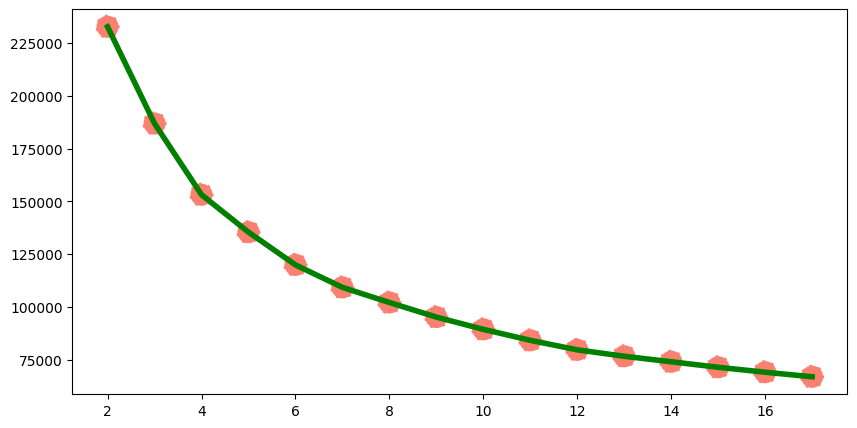

In [ ]:
from sklearn.cluster import KMeans

inertia = []

for i in range(2,18):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(X_std)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))

sns.lineplot(x=range(2, 18), y=inertia, color='green', linewidth = 4)
sns.scatterplot(x=range(2,18), y=inertia, s=300, color='salmon',  linestyle='--')

In [ ]:
from sklearn.metrics import silhouette_score

range_n_cluster = list(range(2,18))
print(range_n_cluster)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_cluster:
  kmeans = KMeans(n_clusters=i).fit(X_std)
  pred= kmeans.predict(scaling_data)

  score_eucledian =silhouette_score(scaling_data, pred, metric='euclidean')
  arr_silhouette_score_euclidean.append(score_eucledian)

<Axes: >

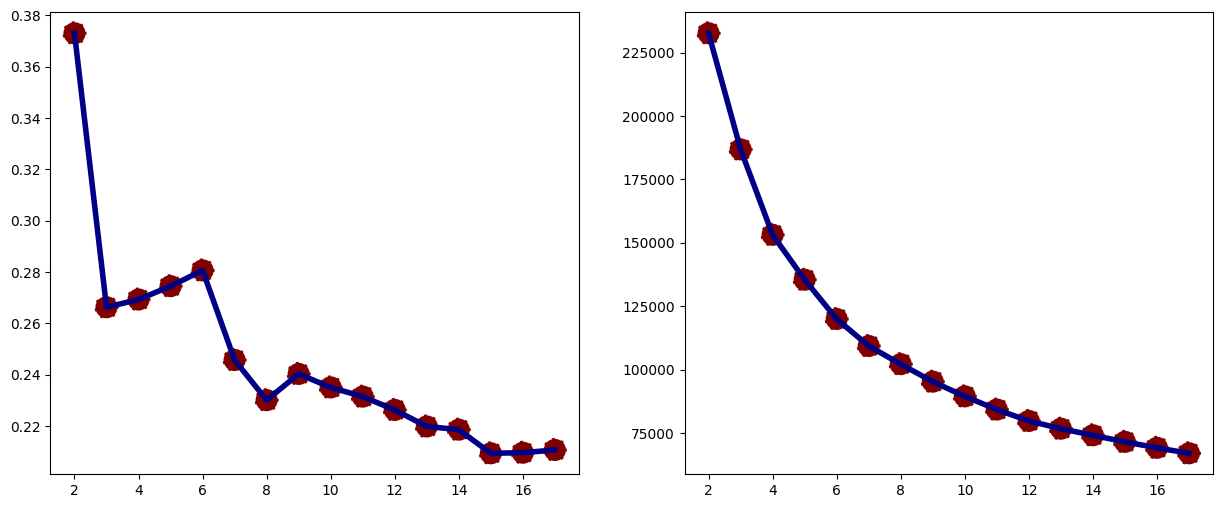

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.lineplot(x=range(2,18), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4, ax=ax[0])
sns.scatterplot(x=range(2,18), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--',ax=ax[0])

sns.lineplot(x=range(2, 18), y=inertia, color='#000087', linewidth = 4,ax=ax[1])
sns.scatterplot(x=range(2, 18), y=inertia, s=300, color='#800000',  linestyle='--', ax=ax[1])

#### Clustering

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_std)

KMeans(n_clusters=6, random_state=0)

In [ ]:
dataset['clusters'] = kmeans.labels_
dataset.head()

,length,recency,frequency,monetary,coefficient,clusters
0,2922,198,3,18770,0.658303,3
1,2922,114,24,35087,0.615947,3
2,2915,84,9,20660,0.522271,3
3,2790,30,12,23071,0.511084,3
4,2244,95,3,2897,0.954166,3


In [ ]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
dataset.describe(percentiles=perc)

,length,recency,frequency,monetary,coefficient,clusters
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,1485.000826,176.120102,11.839414,17123.878691,0.721558,1.976519
std,847.222941,183.822223,14.049471,20960.844623,0.185427,1.709294
min,365.000000,1.000000,2.000000,368.000000,0.000000,0.000000
10%,512.000000,9.000000,2.000000,2727.000000,0.508989,0.000000
20%,656.400000,21.000000,3.000000,4058.000000,0.585000,0.000000
30%,830.000000,39.000000,4.000000,5530.000000,0.635158,0.000000
40%,1032.000000,70.000000,5.000000,7492.800000,0.675905,1.000000
50%,1270.000000,108.000000,7.000000,9994.000000,0.711856,2.000000
60%,1594.000000,155.000000,9.000000,13376.000000,0.748572,3.000000


In [ ]:
dataset.groupby('clusters').agg({
                            'length' : ['median'],
                            'recency' : ['median'],
                            'frequency' : ['mean'],
                            'monetary' : ['median'],
                            'coefficient' : ['mean']

})

,length,recency,frequency,monetary,coefficient
,median,median,mean,median,mean
clusters,,,,,
0,819.0,90.0,7.965896,9449.0,0.677690
1,2179.0,9.0,66.500841,88340.0,0.822211
2,1608.0,21.0,29.823120,40193.0,0.736133
3,2438.0,95.0,8.501293,10181.0,0.693714
4,995.0,483.0,3.788455,4222.0,0.700688
5,1569.0,109.0,10.459971,10528.0,1.230549


`Cluster 0` : **occasional flyers** adalah mereka yang baru mendaftar keanggtaan (relative short membership length), masih jarang transaksi dan sehingga pengeluarannya juga tidak terlalu banyak. Ada potensi yang baik karena masih pelanggan fresh dan banyak yang melakukan transaski dalam kurun waktu yang lumayan dekat.


`Cluster 1` : **elite flyers** adalah mereka yang sudah menjadi anggota dalam sangat lama dan telah melakukan banyak transaksi, sehingga pengeluaran secara keseluruhan sangat tinggi. Mereka juga mengikuti program hadiah dari maskapai sehingga mendapat diskon yang banyak pula


`Cluster 2` : **regular flyers** adlaah mereka yang cukup lama dan lumayan sering membeli tiket pesawat. sehingga secara keseluruhat pengeluaran ada pada tingkat moderat. Kemungkinan mereka ada pelanggan yang loyal dan menggunakan maskapai untuk traveling pribadi dan santai

`Cluster 3`: **low spending Members** adalah mereka yang telah lama menjadi membership namun sangat jarang membeli tiket penerbangan sehingga pengeluarannya tidak terlalu banya. kemungkinan mereka ada pelanggan yang juga membeli sesuai dengan kebutuhan namun jarang memiliki kebutuhan bepergian menggunakan pesawat.


`Cluster 4` : **occasion and diskon seekers customers** adalah mereka dengan keanggotaan pendek, pembelian sedikit, dan pengeluaran rendah. Mereka mungkin baru mendaftar atau berhenti menggunakan layanan maskapai. kemungkinan mereka menggunakan jasa penerbangan jika menemukan diskon yang sesuai dengan kebutuhan.


`Cluster 5` : **gila diskon customers** adalah mereka yang sudah menjadi anggota dala waktu lama, pembelian sering, pengeluaran tinggi, dan menggunakan diskon atau promosi secara aktif.